In [10]:
entré={
    "states": {0, 1, 2},
    "alphabet": {'a', 'b'},
    "transitions": {

        (1, 'a'): {2},
        (1, 'b'): {2},
        (2, 'a'): {2},
        (2, 'b'): {2},
        (0, 'epsilon'): {1},
    },
    "start_state": 0,
    "accept_states": {2}
}

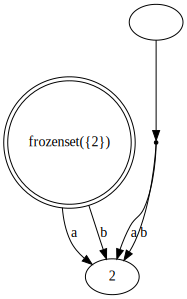

In [11]:
from graphviz import Digraph

class Automaton:
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

    def get_epsilon_closure(self, states):
        epsilon_closure = set(states)
        stack = list(states)
        while stack:
            state = stack.pop()
            transitions = self.transitions.get((state, 'epsilon'), [])
            for next_state in transitions:
                if next_state not in epsilon_closure:
                    epsilon_closure.add(next_state)
                    stack.append(next_state)
        return frozenset(epsilon_closure)

    def get_next_state(self, current_states, symbol):
        next_states = set()
        for state in current_states:
            transitions = self.transitions.get((state, symbol), [])
            next_states.update(transitions)
        epsilon_closure = self.get_epsilon_closure(next_states)
        return epsilon_closure

    def nfa_to_dfa(self):
        dfa_states = set()
        dfa_transitions = {}
        start_state = self.get_epsilon_closure({self.start_state})
        dfa_states.add(start_state)
        stack = [start_state]
        while stack:
            current_states = stack.pop()
            for symbol in self.alphabet:
                next_states = self.get_next_state(current_states, symbol)
                if next_states:
                    dfa_transitions[(current_states, symbol)] = next_states
                    if next_states not in dfa_states:
                        dfa_states.add(next_states)
                        stack.append(next_states)

        dfa_accept_states = [state for state in dfa_states if state.intersection(self.accept_states)]

        return Automaton(dfa_states, self.alphabet, dfa_transitions, start_state, dfa_accept_states)

    def to_graphviz(self):
        dot = Digraph()

        # Ajouter les états
        for state in self.states:
            dot.node(str(state), shape="circle")

        # Marquer l'état initial
        dot.node(str(self.start_state), shape="point")
        dot.edge('', str(self.start_state))

        # Marquer les états acceptants
        for accept_state in self.accept_states:
            dot.node(str(accept_state), shape="doublecircle")

        # Ajouter les transitions
        for (source, symbol), target in self.transitions.items():
            for state in target:
                dot.edge(str(source), str(state), label=str(symbol))

        return dot

# Exemple d'un automate NFA
nfa_data = entré

nfa = Automaton(**nfa_data)

# Convertir NFA en DFA
dfa = nfa.nfa_to_dfa()

# Afficher l'automate NFA et enregistrer l'image
nfa_graph = nfa.to_graphviz()
nfa_graph.render('nfa', format='png', cleanup=True)

# Afficher l'automate DFA et enregistrer l'image
dfa_graph = dfa.to_graphviz()
dfa_graph.render('dfa', format='png', cleanup=True)

# Afficher les graphes NFA et DFA
nfa_graph
dfa_graph


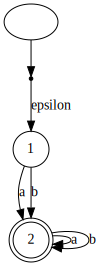

In [12]:
from graphviz import Digraph

class Automaton:
    def __init__(self, states, alphabet, transitions, start_state, accept_states):
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.accept_states = accept_states

    def get_epsilon_closure(self, states):
        epsilon_closure = set(states)
        stack = list(states)
        while stack:
            state = stack.pop()
            transitions = self.transitions.get((state, 'epsilon'), [])
            for next_state in transitions:
                if next_state not in epsilon_closure:
                    epsilon_closure.add(next_state)
                    stack.append(next_state)
        return frozenset(epsilon_closure)

    def get_next_state(self, current_states, symbol):
        next_states = set()
        for state in current_states:
            transitions = self.transitions.get((state, symbol), [])
            next_states.update(transitions)
        epsilon_closure = self.get_epsilon_closure(next_states)
        return epsilon_closure

    def nfa_to_dfa(self):
        dfa_states = set()
        dfa_transitions = {}
        start_state = self.get_epsilon_closure({self.start_state})
        dfa_states.add(start_state)
        stack = [start_state]
        while stack:
            current_states = stack.pop()
            for symbol in self.alphabet:
                next_states = self.get_next_state(current_states, symbol)
                if next_states:
                    dfa_transitions[(current_states, symbol)] = next_states
                    if next_states not in dfa_states:
                        dfa_states.add(next_states)
                        stack.append(next_states)

        dfa_accept_states = [state for state in dfa_states if state.intersection(self.accept_states)]

        return Automaton(dfa_states, self.alphabet, dfa_transitions, start_state, dfa_accept_states)

    def to_graphviz(self):
        dot = Digraph()

        # Ajouter les états
        for state in self.states:
            dot.node(str(state), shape="circle")

        # Marquer l'état initial
        dot.node(str(self.start_state), shape="point")
        dot.edge('', str(self.start_state))

        # Marquer les états acceptants
        for accept_state in self.accept_states:
            dot.node(str(accept_state), shape="doublecircle")

        # Ajouter les transitions
        for (source, symbol), target in self.transitions.items():
            for state in target:
                dot.edge(str(source), str(state), label=str(symbol))

        return dot

# Exemple d'un automate NFA
nfa_data =entré

nfa = Automaton(**nfa_data)

# Convertir NFA en DFA
dfa = nfa.nfa_to_dfa()

# Afficher l'automate NFA et enregistrer l'image
nfa_graph = nfa.to_graphviz()
nfa_graph.render('nfa', format='png', cleanup=True)

# Afficher l'automate DFA et enregistrer l'image
dfa_graph = dfa.to_graphviz()
dfa_graph.render('dfa', format='png', cleanup=True)

# Afficher les graphes NFA et DFA
nfa_graph

